In [1]:
import sys
import torch
import math
import numpy as np
import pandas as pd
import torch.nn as nn

sys.path.insert(0,'../')

from gtm import GTMEstimator

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris, load_wine, load_boston, make_blobs, make_classification

from IPython.display import clear_output

## Iris

In [2]:
data = load_iris()

in_features = 2
hidden_features = 16
out_features = data.data.shape[1]

y = nn.Sequential(
    nn.Linear(in_features, hidden_features),
    nn.ReLU(),
    nn.Linear(hidden_features, out_features),
    )

y.to(torch.device("cuda"))

est = GTMEstimator(in_features=in_features, out_features=out_features, n_x_points=20, verbose=False, y=y, cuda=True)
X = torch.FloatTensor(data.data).to(torch.device("cuda"))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.cpu().numpy())

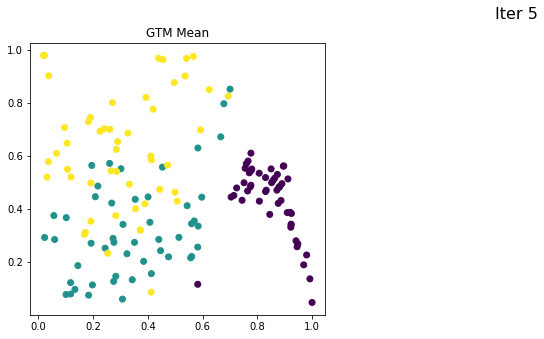

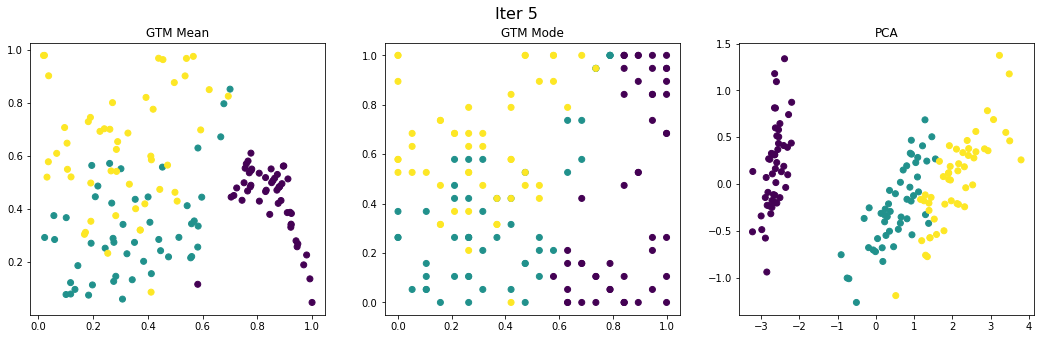

In [6]:
try:
    for i in range(1000):
        est.train_epochs(X, 100)


        est.method = "mean"
        output_mean = (est.transform(X)).cpu().numpy()    

        est.method = "mode"
        output_mode = (est.transform(X)).cpu().numpy() 
        clear_output(wait=True)
        plt.figure(figsize=(18, 5))
        plt.suptitle(f'Iter {i}', fontsize=16)

        ax_mean = plt.subplot(131)
        ax_mean.scatter(*output_mean.T, c=data.target)
        ax_mean.set_title("GTM Mean")

        ax_mode = plt.subplot(132)
        ax_mode.scatter(*output_mode.T, c=data.target)
        ax_mode.set_title("GTM Mode")

        ax_pca = plt.subplot(133)
        ax_pca.scatter(*X_pca.T, c=data.target)
        ax_pca.set_title("PCA")

        plt.show()
except:
        est.method = "mean"
        output_mean = (est.transform(X)).cpu().numpy()    

        est.method = "mode"
        output_mode = (est.transform(X)).cpu().numpy() 
        
        clear_output(wait=True)
        plt.figure(figsize=(18, 5))
        plt.suptitle(f'Iter {i}', fontsize=16)

        ax_mean = plt.subplot(131)
        ax_mean.scatter(*output_mean.T, c=data.target)
        ax_mean.set_title("GTM Mean")

        ax_mode = plt.subplot(132)
        ax_mode.scatter(*output_mode.T, c=data.target)
        ax_mode.set_title("GTM Mode")

        ax_pca = plt.subplot(133)
        ax_pca.scatter(*X_pca.T, c=data.target)
        ax_pca.set_title("PCA")

        plt.show()

## Wine


Here the problem is that the initial guess of neural network is so far away from truth, that it gives 0 probabilities and -inf negative log likelihood

In [21]:
data = load_wine()

in_features = 2
out_features = data.data.shape[1]
hidden_features = 56

y = nn.Sequential(
    nn.Linear(in_features, hidden_features,),
    nn.ELU(),
    nn.Linear(hidden_features, out_features, bias=False),
    )

y.to(torch.device("cuda"))

est = GTMEstimator(in_features=in_features, out_features=out_features, n_x_points=100, verbose=False, y=y, cuda=True)
X = torch.FloatTensor(data.data).to(torch.device("cuda"))


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.cpu())

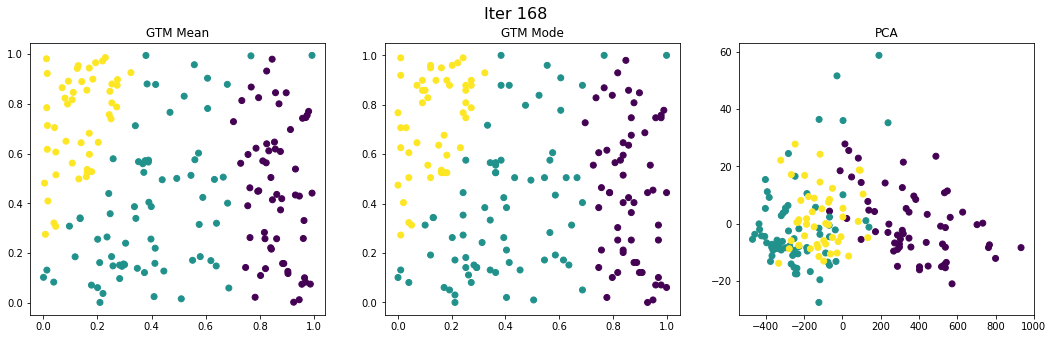

In [22]:
try:
    for i in range(1000):
        est.train_epochs(X, 100)


        est.method = "mean"
        output_mean = (est.transform(X)).cpu().numpy()    

        est.method = "mode"
        output_mode = (est.transform(X)).cpu().numpy() 
        clear_output(wait=True)
        plt.figure(figsize=(18, 5))
        plt.suptitle(f'Iter {i}', fontsize=16)

        ax_mean = plt.subplot(131)
        ax_mean.scatter(*output_mean.T, c=data.target)
        ax_mean.set_title("GTM Mean")

        ax_mode = plt.subplot(132)
        ax_mode.scatter(*output_mode.T, c=data.target)
        ax_mode.set_title("GTM Mode")

        ax_pca = plt.subplot(133)
        ax_pca.scatter(*X_pca.T, c=data.target)
        ax_pca.set_title("PCA")

        plt.show()
except:
        est.method = "mean"
        output_mean = (est.transform(X)).cpu().numpy()    

        est.method = "mode"
        output_mode = (est.transform(X)).cpu().numpy() 
        
        clear_output(wait=True)
        plt.figure(figsize=(18, 5))
        plt.suptitle(f'Iter {i}', fontsize=16)

        ax_mean = plt.subplot(131)
        ax_mean.scatter(*output_mean.T, c=data.target)
        ax_mean.set_title("GTM Mean")

        ax_mode = plt.subplot(132)
        ax_mode.scatter(*output_mode.T, c=data.target)
        ax_mode.set_title("GTM Mode")

        ax_pca = plt.subplot(133)
        ax_pca.scatter(*X_pca.T, c=data.target)
        ax_pca.set_title("PCA")

        plt.show()

## Boston

Here the problem is that the initial guess of neural network is so far away from truth, that it gives 0 probabilities and -inf negative log likelihood

In [23]:
data = load_boston()

in_features = 2
out_features = data.data.shape[1]
hidden_features = 56

y = nn.Sequential(
    nn.Linear(in_features, hidden_features,),
    nn.ELU(),
    nn.Linear(hidden_features, out_features, bias=False),
    )

y.to(torch.device("cuda"))

est = GTMEstimator(in_features=in_features, out_features=out_features, n_x_points=100, verbose=False, y=y, cuda=True)
X = torch.FloatTensor(data.data).to(torch.device("cuda"))


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.cpu())

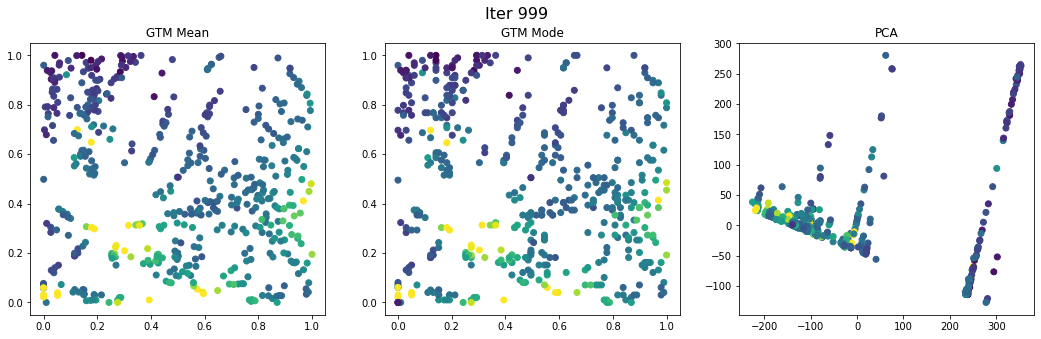

In [24]:
try:
    for i in range(1000):
        est.train_epochs(X, 100)


        est.method = "mean"
        output_mean = (est.transform(X)).cpu().numpy()    

        est.method = "mode"
        output_mode = (est.transform(X)).cpu().numpy() 
        clear_output(wait=True)
        plt.figure(figsize=(18, 5))
        plt.suptitle(f'Iter {i}', fontsize=16)

        ax_mean = plt.subplot(131)
        ax_mean.scatter(*output_mean.T, c=data.target)
        ax_mean.set_title("GTM Mean")

        ax_mode = plt.subplot(132)
        ax_mode.scatter(*output_mode.T, c=data.target)
        ax_mode.set_title("GTM Mode")

        ax_pca = plt.subplot(133)
        ax_pca.scatter(*X_pca.T, c=data.target)
        ax_pca.set_title("PCA")

        plt.show()
except:
        est.method = "mean"
        output_mean = (est.transform(X)).cpu().numpy()    

        est.method = "mode"
        output_mode = (est.transform(X)).cpu().numpy() 
        
        clear_output(wait=True)
        plt.figure(figsize=(18, 5))
        plt.suptitle(f'Iter {i}', fontsize=16)

        ax_mean = plt.subplot(131)
        ax_mean.scatter(*output_mean.T, c=data.target)
        ax_mean.set_title("GTM Mean")

        ax_mode = plt.subplot(132)
        ax_mode.scatter(*output_mode.T, c=data.target)
        ax_mode.set_title("GTM Mode")

        ax_pca = plt.subplot(133)
        ax_pca.scatter(*X_pca.T, c=data.target)
        ax_pca.set_title("PCA")

        plt.show()

## Blobs

In [30]:
class load_blobs():
    def __init__(self, centers=2):
        self.data, self.target = make_blobs(centers=centers)

In [31]:
data = load_blobs()

in_features = 2
out_features = data.data.shape[1]
hidden_features = 56

y = nn.Sequential(
    nn.Linear(in_features, hidden_features,),
    nn.ELU(),
    nn.Linear(hidden_features, out_features, bias=False),
    )

y.to(torch.device("cuda"))

est = GTMEstimator(in_features=in_features, out_features=out_features, n_x_points=100, verbose=False, y=y, cuda=True)
X = torch.FloatTensor(data.data).to(torch.device("cuda"))


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.cpu())

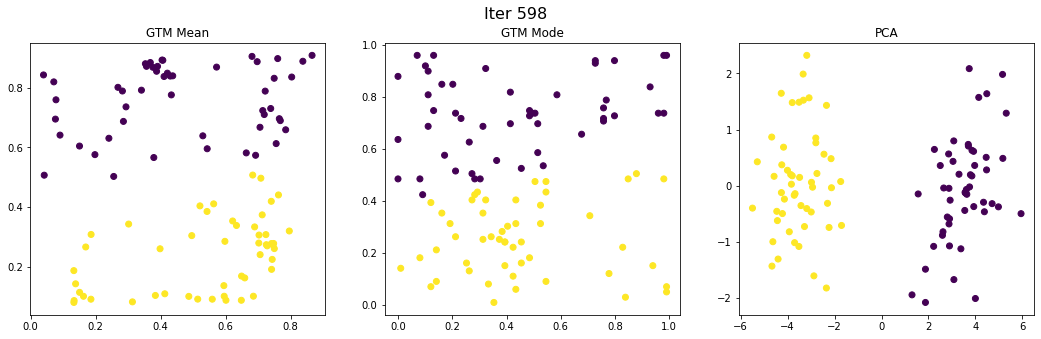

In [33]:
try:
    for i in range(1000):
        est.train_epochs(X, 100)


        est.method = "mean"
        output_mean = (est.transform(X)).cpu().numpy()    

        est.method = "mode"
        output_mode = (est.transform(X)).cpu().numpy() 
        clear_output(wait=True)
        plt.figure(figsize=(18, 5))
        plt.suptitle(f'Iter {i}', fontsize=16)

        ax_mean = plt.subplot(131)
        ax_mean.scatter(*output_mean.T, c=data.target)
        ax_mean.set_title("GTM Mean")

        ax_mode = plt.subplot(132)
        ax_mode.scatter(*output_mode.T, c=data.target)
        ax_mode.set_title("GTM Mode")

        ax_pca = plt.subplot(133)
        ax_pca.scatter(*X_pca.T, c=data.target)
        ax_pca.set_title("PCA")

        plt.show()
except:
        est.method = "mean"
        output_mean = (est.transform(X)).cpu().numpy()    

        est.method = "mode"
        output_mode = (est.transform(X)).cpu().numpy() 
        
        clear_output(wait=True)
        plt.figure(figsize=(18, 5))
        plt.suptitle(f'Iter {i}', fontsize=16)

        ax_mean = plt.subplot(131)
        ax_mean.scatter(*output_mean.T, c=data.target)
        ax_mean.set_title("GTM Mean")

        ax_mode = plt.subplot(132)
        ax_mode.scatter(*output_mode.T, c=data.target)
        ax_mode.set_title("GTM Mode")

        ax_pca = plt.subplot(133)
        ax_pca.scatter(*X_pca.T, c=data.target)
        ax_pca.set_title("PCA")

        plt.show()

## Random classification

In [37]:
class load_classification():
    def __init__(self, n_samples=100, n_features=20, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2):
        self.data, self.target = make_classification(n_samples=n_samples, n_features=n_features, n_informative=n_informative, n_redundant=n_redundant, n_repeated=n_repeated, n_classes=n_classes)

In [38]:
data = load_classification()

in_features = 2
out_features = data.data.shape[1]
hidden_features = 56

y = nn.Sequential(
    nn.Linear(in_features, hidden_features,),
    nn.ELU(),
    nn.Linear(hidden_features, out_features, bias=False),
    )

y.to(torch.device("cuda"))

est = GTMEstimator(in_features=in_features, out_features=out_features, n_x_points=100, verbose=False, y=y, cuda=True)
X = torch.FloatTensor(data.data).to(torch.device("cuda"))


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.cpu())

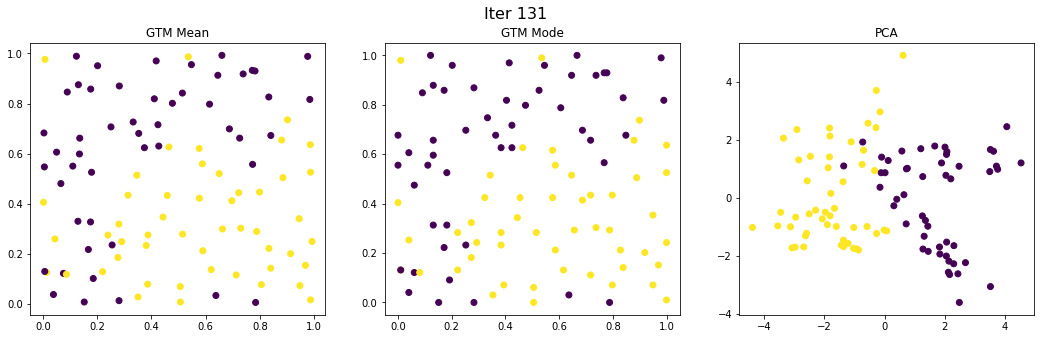

In [39]:
try:
    for i in range(1000):
        est.train_epochs(X, 100)


        est.method = "mean"
        output_mean = (est.transform(X)).cpu().numpy()    

        est.method = "mode"
        output_mode = (est.transform(X)).cpu().numpy() 
        clear_output(wait=True)
        plt.figure(figsize=(18, 5))
        plt.suptitle(f'Iter {i}', fontsize=16)

        ax_mean = plt.subplot(131)
        ax_mean.scatter(*output_mean.T, c=data.target)
        ax_mean.set_title("GTM Mean")

        ax_mode = plt.subplot(132)
        ax_mode.scatter(*output_mode.T, c=data.target)
        ax_mode.set_title("GTM Mode")

        ax_pca = plt.subplot(133)
        ax_pca.scatter(*X_pca.T, c=data.target)
        ax_pca.set_title("PCA")

        plt.show()
except:
        est.method = "mean"
        output_mean = (est.transform(X)).cpu().numpy()    

        est.method = "mode"
        output_mode = (est.transform(X)).cpu().numpy() 
        
        clear_output(wait=True)
        plt.figure(figsize=(18, 5))
        plt.suptitle(f'Iter {i}', fontsize=16)

        ax_mean = plt.subplot(131)
        ax_mean.scatter(*output_mean.T, c=data.target)
        ax_mean.set_title("GTM Mean")

        ax_mode = plt.subplot(132)
        ax_mode.scatter(*output_mode.T, c=data.target)
        ax_mode.set_title("GTM Mode")

        ax_pca = plt.subplot(133)
        ax_pca.scatter(*X_pca.T, c=data.target)
        ax_pca.set_title("PCA")

        plt.show()